c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.6935
Precision: 0.1287
Recall: 0.8113
F1 Score: 0.2222


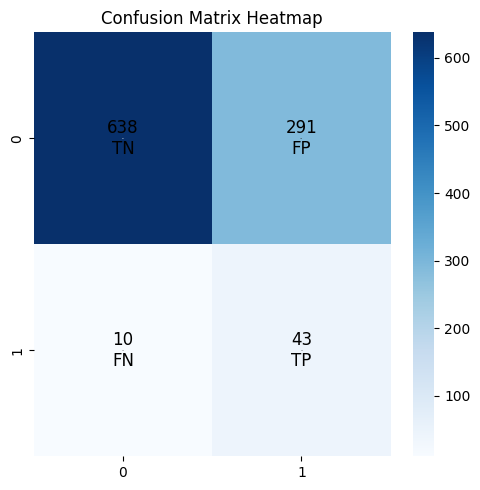

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from dataloader_module import load_data
from metrics_module import metrics
from imblearn.over_sampling import SMOTE
from graphs_module import plot_roc_auc


# Càrrega i pre-processament de les dades
datafile = "data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)

# Dividir les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE per equilibrar les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el model AdaBoost
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Obtenir les probabilitats de predicció
y_proba = clf.predict_proba(X_test)[:, 1]

# Ajustar el threshold de decisió
threshold = 0.49  # Canvia aquest valor per ajustar el threshold
y_pred = (y_proba >= threshold).astype(int)

# Guardar les prediccions en un fitxer .npy
np.save('predictions/predictions_adaboost.npy', y_pred)

# Avaluar el model
accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)


## ROC Curve i AUC

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


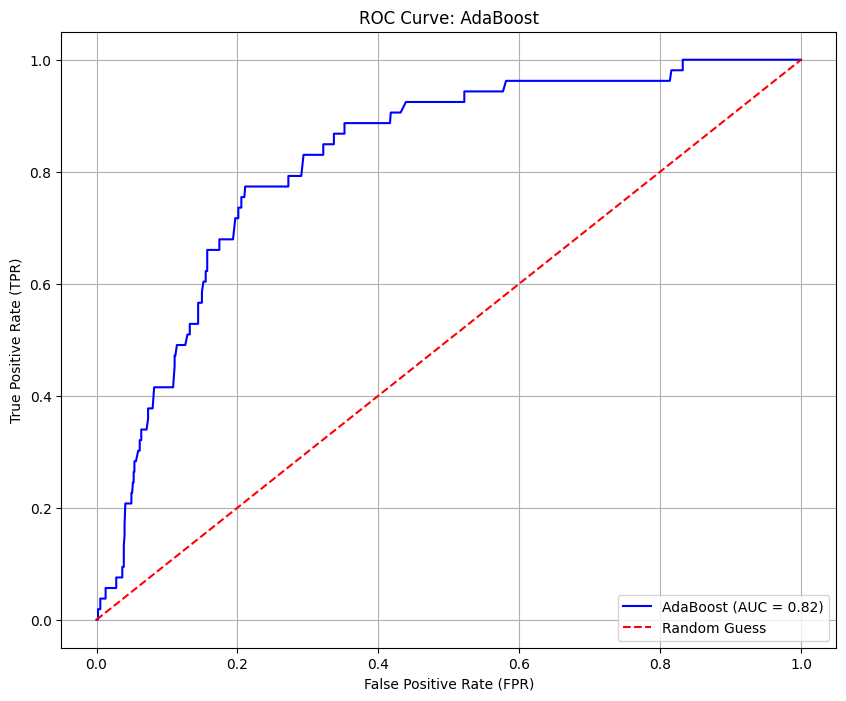

AdaBoost AUC Score: 0.82


In [17]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="AdaBoost")